# Predicting Hotel Booking Cancellations
### Data Preprocessing and Predictive Modeling with Classification Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

### Prepare data for Machine Learning Models

In [2]:
data = pd.read_csv('./Datasets/clean_EDA_data.csv')

pd.options.display.max_columns = None

display(data.head(3), data.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_month_num,arrival_date_week_number,arrival_date_day_of_month,check_in_date,total_nights,stays_in_weekend_nights,stays_in_week_nights,weekend_or_weekday,adults,children,babies,total_guests,country,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,342,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
1,Resort Hotel,1,737,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
2,Resort Hotel,0,7,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


(119210, 35)

In [3]:
# Convert column to datetime type
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract day, month, and year from 'reservation_status_date'
data['reservation_status_day'] = data['reservation_status_date'].dt.day
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_year'] = data['reservation_status_date'].dt.year

# Drop the 'reservation_status_date' column
data = data.drop('reservation_status_date', axis=1)

In [4]:
# Drop unnecessary columns
data = data.drop(data[['check_in_date','arrival_date_month_num']], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   total_nights                    119210 non-null  int64  
 8   stays_in_weekend_nights         119210 non-null  int64  
 9   stays_in_week_nights            119210 non-null  int64  
 10  weekend_or_weekday              119210 non-null  object 
 11  adults                          119210 non-null  int64  
 12  children        

In [6]:
# Split into numerical and categorical data:

# List comprehension to get numerical and categorical columns
num_features =[col for col in data.columns if data[col].dtype != 'object']
cat_features =[col for col in data.columns if data[col].dtype == 'object']

display(f'Numerical columns: {len(num_features)}, Categorical columns: {len(cat_features)}')

# Assign to new variables
cat_data = data[cat_features]
num_data = data[num_features]

'Numerical columns: 23, Categorical columns: 12'

#### Categorical Data

In [7]:
display(cat_data.head(3), cat_data.shape)

,hotel,arrival_date_month,weekend_or_weekday,country,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,undefined_data,PRT,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled
1,Resort Hotel,July,undefined_data,PRT,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled
2,Resort Hotel,July,stay_just_weekdays,GBR,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out


(119210, 12)

In [8]:
cat_data.isnull().sum()

hotel                   0
arrival_date_month      0
weekend_or_weekday      0
country                 0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
assigned_room_type      0
deposit_type            0
customer_type           0
reservation_status      0
dtype: int64

In [9]:
# Count unique values for each column
cat_data.nunique()

hotel                     2
arrival_date_month       12
weekend_or_weekday        4
country                 177
meal                      5
market_segment            8
distribution_channel      5
reserved_room_type        9
assigned_room_type       11
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

Reduce unique values for some features if possible

In [10]:
for col in cat_data.columns:
    display(f"{col}: {cat_data[col].unique()}")

"hotel: ['Resort Hotel' 'City Hotel']"

"arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'\n 'February' 'March' 'April' 'May' 'June']"

"weekend_or_weekday: ['undefined_data' 'stay_just_weekdays' 'stay_both_weekdays_weekends'\n 'stay_just_weekend']"

"country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'\n 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'\n 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'\n 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'\n 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'\n 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'\n 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'\n 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'\n 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'\n 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'\n 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'\n 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'\n 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'\n 'NAM' 'BOL' 'PRY' 'BRB' 'ABW

"meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']"

"market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'\n 'Undefined' 'Aviation']"

"distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']"

"reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']"

"assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']"

"deposit_type: ['No Deposit' 'Refundable' 'Non Refund']"

"customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']"

"reservation_status: ['Canceled' 'Check-Out' 'No-Show']"

- Country

In [11]:
# Select top 10 guest's countries.
top10_country = cat_data['country'].value_counts().nlargest(10)
top10_country

PRT    48940
GBR    12127
FRA    10402
ESP     8564
DEU     7285
ITA     3761
IRL     3380
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

In [12]:
# List with country codes to be replaced (not belonging to top 10)
country_to_continent = []

for country in cat_data['country']:
    if country not in top10_country and country not in country_to_continent:
        country_to_continent.append(country)

len(country_to_continent)

167

In [13]:
# Create a new column to store the continent information
cat_data['country_or_continent'] = ''

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_6059/808702770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['country_or_continent'] = ''


In [14]:
# Import library to get information of the country code: full name, continent...
from country_converter import CountryConverter

# Create an instance of the CountryConverter
cc = CountryConverter()

# Get unique country codes from the 'country_to_continent' list
unique_country_codes = set(country_to_continent)

# Initialize lists to store country code and continent data
country_codes = []
continents = []

# Populate the lists with country codes and continents
for code in unique_country_codes:
    continent = cc.convert(code, to='continent')
    country_codes.append(code)
    continents.append(continent)

# Create a new DataFrame
continent_df = pd.DataFrame({'country_code': country_codes, 'continent': continents})


TMP not found in ISO3


In [15]:
# Check values and count
continent_df['continent'].value_counts()

Africa        43
Asia          42
Europe        38
America       33
Oceania        9
Antarctica     1
not found      1
Name: continent, dtype: int64

In [16]:
# Search for 'not found' value
continent_df[continent_df['continent'] == 'not found']

,country_code,continent
162,TMP,not found


In [17]:
# Get index of that row
index_to_replace = continent_df[continent_df['country_code'] == 'TMP'].index[0]

# Replace the 'continent' value 'not found' for 'Asia'
continent_df.loc[index_to_replace, 'continent'] = 'Asia'

continent_df['continent'].value_counts()

Africa        43
Asia          43
Europe        38
America       33
Oceania        9
Antarctica     1
Name: continent, dtype: int64

In [18]:
# Count of new df (should be equal to unique values of 'country_to_continent' list)
continent_df['continent'].value_counts().sum()

167

In [19]:
# Empty column ready to be filled
cat_data['country_or_continent'].value_counts()

    119210
Name: country_or_continent, dtype: int64

In [20]:
# Loop through each index and corresponding country code in the 'country' column of cat_data
for index, country in enumerate(cat_data['country']):
    
    # Check if the country code is in the country_to_continent list
    if country in country_to_continent:
        
        # Get the continent value from the continent_df DataFrame where 'country_code' matches the current country
        continent = continent_df[continent_df['country_code'] == country]['continent'].values
        
        if continent:
            # If the 'continent' value exists (not an empty array), update the 'country_or_continent' column in cat_data
            cat_data.at[index, 'country_or_continent'] = continent[0]
    else:
        # If the country code is not in the country_to_continent list, update 'country_or_continent' with the country code
        cat_data.at[index, 'country_or_continent'] = country


In [21]:
# Result
cat_data['country_or_continent'].value_counts()

PRT           48940
GBR           12127
FRA           10402
Europe         9237
ESP            8564
DEU            7285
Asia           4470
ITA            3761
IRL            3380
America        2754
BEL            2342
BRA            2222
NLD            2103
Africa         1114
Oceania         507
Antarctica        2
Name: country_or_continent, dtype: int64

In [22]:
# Make sure no row is missed
cat_data['country_or_continent'].value_counts().sum() == data['country'].value_counts().sum()

True

In [23]:
# Combine 'Oceania' and 'Antarctica' values into 'Oceania&Antarctica'
cat_data['country_or_continent'] = cat_data['country_or_continent'].replace(['Oceania', 'Antarctica'], 'Oceania&Antarctica')

cat_data['country_or_continent'].value_counts()

/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_6059/2517437347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['country_or_continent'] = cat_data['country_or_continent'].replace(['Oceania', 'Antarctica'], 'Oceania&Antarctica')


PRT                   48940
GBR                   12127
FRA                   10402
Europe                 9237
ESP                    8564
DEU                    7285
Asia                   4470
ITA                    3761
IRL                    3380
America                2754
BEL                    2342
BRA                    2222
NLD                    2103
Africa                 1114
Oceania&Antarctica      509
Name: country_or_continent, dtype: int64

In [24]:
# Drop 'country' column
cat_data = cat_data.drop('country', axis=1)

- Deposit Type

In [25]:
# I'll assume 'Refundable' == 'No Deposit'
cat_data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [26]:
# Reduce values using a dictionary
dict1={'No Deposit': 0, 'Refundable': 0, 'Non Refund': 1}

# Map the dictionary
cat_data['deposit_given'] = cat_data['deposit_type'].map(dict1)

cat_data['deposit_given'].value_counts()

0    104623
1     14587
Name: deposit_given, dtype: int64

In [27]:
for col in cat_data.columns:
    display(f"{col}: {cat_data[col].unique()}")

"hotel: ['Resort Hotel' 'City Hotel']"

"arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'\n 'February' 'March' 'April' 'May' 'June']"

"weekend_or_weekday: ['undefined_data' 'stay_just_weekdays' 'stay_both_weekdays_weekends'\n 'stay_just_weekend']"

"meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']"

"market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'\n 'Undefined' 'Aviation']"

"distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']"

"reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']"

"assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']"

"deposit_type: ['No Deposit' 'Refundable' 'Non Refund']"

"customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']"

"reservation_status: ['Canceled' 'Check-Out' 'No-Show']"

"country_or_continent: ['PRT' 'GBR' 'America' 'ESP' 'IRL' 'FRA' 'Europe' 'Asia' 'DEU' 'BEL' 'ITA'\n 'NLD' 'Oceania&Antarctica' 'BRA' 'Africa']"

'deposit_given: [0 1]'

#### Numerical Data

In [28]:
num_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_guests,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,reservation_status_year
0,1,342,2015,27,1,0,0,0,2,0,0,2,0,0,0,3,0,0.0,0,0,1,7,2015
1,1,737,2015,27,1,0,0,0,2,0,0,2,0,0,0,4,0,0.0,0,0,1,7,2015
2,0,7,2015,27,1,1,0,1,1,0,0,1,0,0,0,0,0,75.0,0,0,2,7,2015
3,0,13,2015,27,1,1,0,1,1,0,0,1,0,0,0,0,0,75.0,0,0,2,7,2015
4,0,14,2015,27,1,2,0,2,2,0,0,2,0,0,0,0,0,98.0,0,1,3,7,2015


In [29]:
num_data.isnull().sum().sum()

0

In [30]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.376026,0.484389,0.00,0.0,0.0,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.0,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.00,8.0,16.0,23.0,31.0
total_nights,119210.0,2.133009,2.603408,0.00,0.0,1.0,3.0,69.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.00,1.0,2.0,3.0,50.0
adults,119210.0,1.859206,0.575186,0.00,2.0,2.0,2.0,55.0
children,119210.0,0.104043,0.398836,0.00,0.0,0.0,0.0,10.0


- ADR

In [31]:
# ADR
num_data['adr'].describe()

count    119210.000000
mean        102.844886
std          49.653160
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [32]:
# Rows with negative value of 'adr'
num_data['adr'][num_data['adr'] < 0]

14962   -6.38
Name: adr, dtype: float64

In [33]:
def hist_and_box_plots(col):
    # Create a figure with two subplots
    plt.figure(figsize=(12, 5))
    
    # Create the first subplot (Histogram)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(data=num_data, x=col, bins=100)
    plt.title('Histogram of ' + col)
    
    # Create the second subplot (Box Plot)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(data=num_data, x=col)
    plt.title('Box Plot of ' + col)
    
    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    
    return num_data[col].describe().T

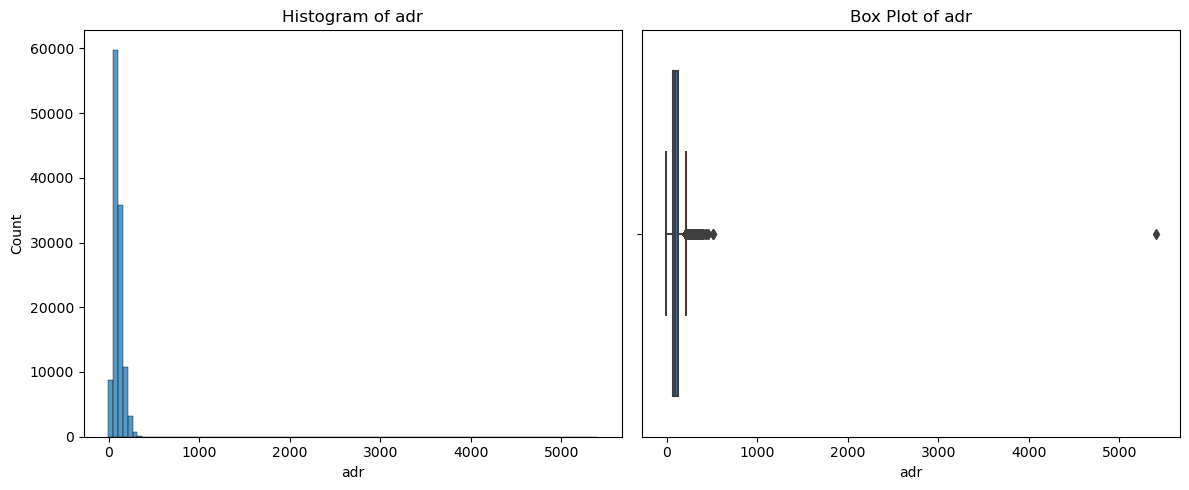

count    119210.000000
mean        102.844886
std          49.653160
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [34]:
# Call the function with 'adr' column
hist_and_box_plots('adr')

On the one hand, we find one row with a negative 'adr'. On the other side, there is an extreme outlier as well. Since they are just two rows, I'm going to delete them.

In [35]:
# Drop rows from num_data where 'adr' is less than 0 or greater than 1000
rows_to_drop = num_data[(num_data['adr'] < 0) | (num_data['adr'] > 1000)].index

# Drop rows from num_data
num_data = num_data.drop(rows_to_drop)

# Drop corresponding rows from cat_data
cat_data = cat_data.drop(rows_to_drop)

# Print the updated num_data and cat_data shapes
print("Updated num_data shape:", num_data.shape)
print("Updated cat_data shape:", cat_data.shape)

Updated num_data shape: (119208, 23)
Updated cat_data shape: (119208, 13)


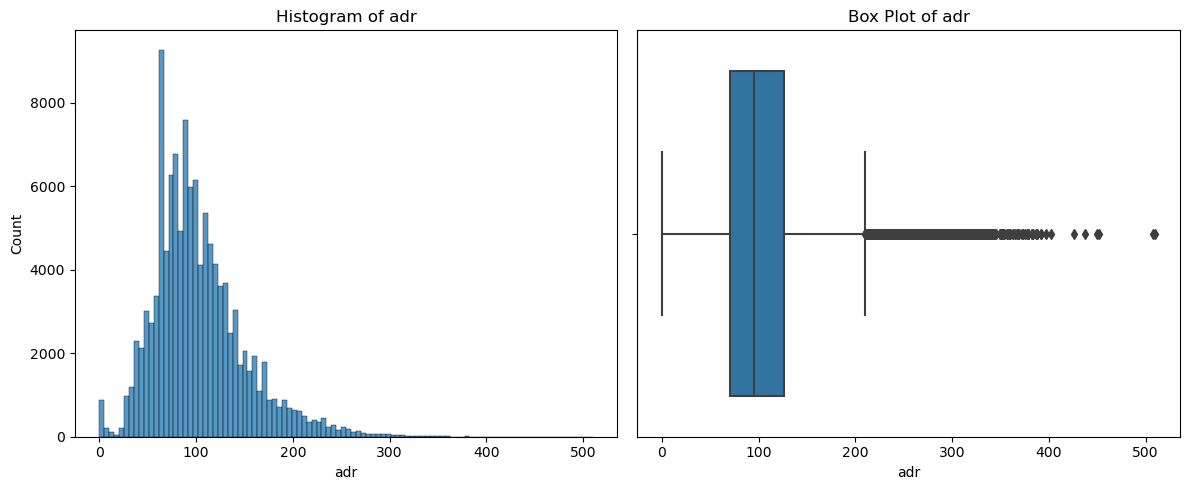

count    119208.000000
mean        102.801366
std          47.222750
min           0.000000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [36]:
# Call the function again
hist_and_box_plots('adr')

As these plots still show a highly positively skewed data distribution, I'll reduce the impact of extreme values and make the data more normally distributed by using the **IQR (Interquartile Range) Method**: Replace values outside a certain range defined by the IQR (Q3 - Q1) with the nearest boundary value (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

In [37]:
def handle_outliers_iqr(column, multiplier=1.5):
    # Calculate the first quartile (25th percentile) and the third quartile (75th percentile)
    # of the data in the specified column
    Q1 = num_data[column].quantile(0.25)
    Q3 = num_data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR) of the data
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bound for outlier detection using the IQR and multiplier
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Replace values in the column that are below the lower bound with the lower bound
    num_data[column] = np.where(num_data[column] < lower_bound, lower_bound, num_data[column])
    
    # Replace values in the column that are above the upper bound with the upper bound
    num_data[column] = np.where(num_data[column] > upper_bound, upper_bound, num_data[column])
    
    # Call the function to create histograms and box plots of the cleaned data
    hist_and_box_plots(column)
    
    return num_data[column].describe().T

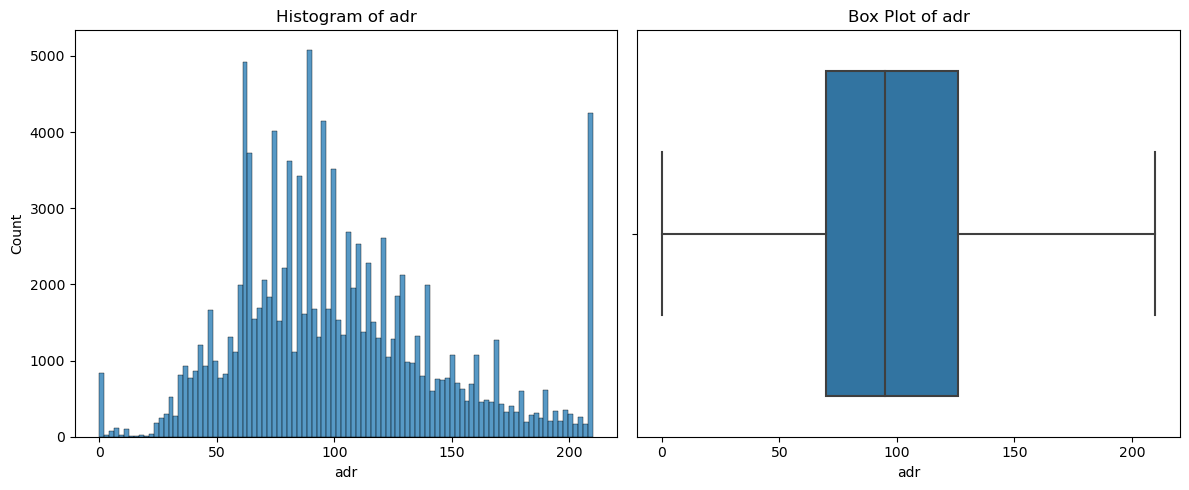

count    119208.000000
mean        101.636699
std          43.617779
min           0.000000
25%          70.000000
50%          95.000000
75%         126.000000
max         210.000000
Name: adr, dtype: float64

In [38]:
# Call the outlier handling function
handle_outliers_iqr('adr')

- Lead Time

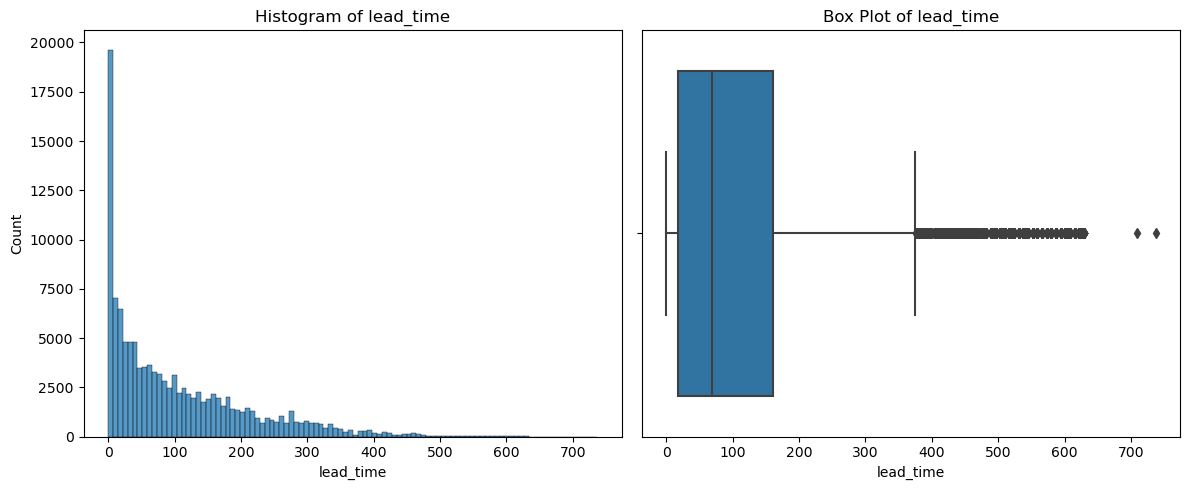

count    119208.000000
mean        104.109045
std         106.875835
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [39]:
# Call the function with 'lead_time' column
hist_and_box_plots('lead_time')

These plots also exhibit a highly positive skewness.

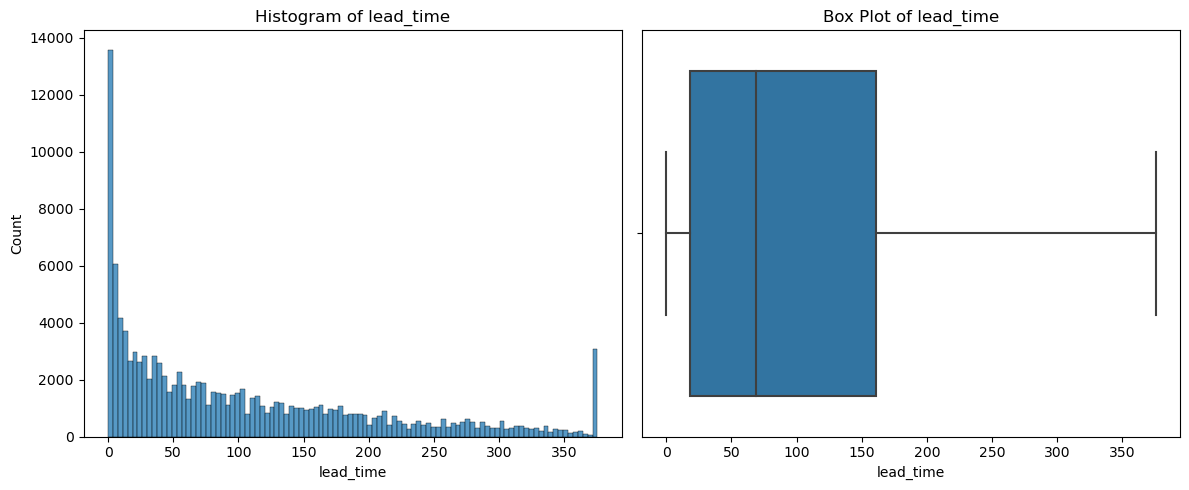

count    119208.000000
mean        102.387302
std         101.335101
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         375.500000
Name: lead_time, dtype: float64

In [40]:
# Call the outlier handling function
handle_outliers_iqr('lead_time')

- Total Guests

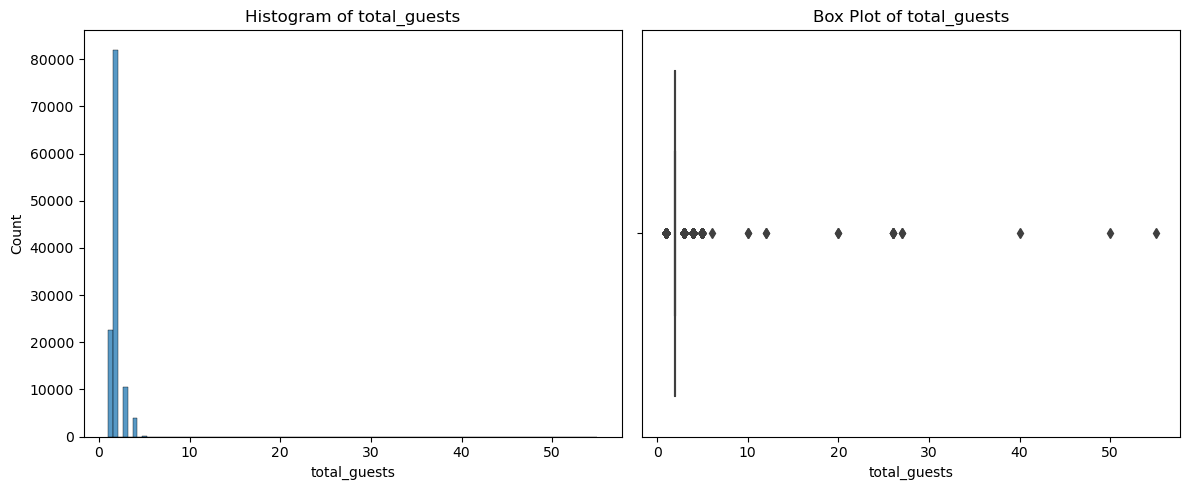

count    119208.000000
mean          1.971210
std           0.718882
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: total_guests, dtype: float64

In [41]:
# Plot 'total_guests'
hist_and_box_plots('total_guests')

In [42]:
num_data['total_guests'].value_counts().sort_index(ascending=True)

1     22581
2     82049
3     10495
4      3929
5       137
6         1
10        2
12        2
20        2
26        5
27        2
40        1
50        1
55        1
Name: total_guests, dtype: int64

In [43]:
len(num_data[num_data['total_guests'] >6])

16

In [44]:
# Define the bin edges and labels
bin_edges = [1, 2, 3, float('inf')]
bin_labels = ['Single', 'Double', 'Triple or more guests']

# Categorize the 'total_guests' column using pd.cut()
num_data['guest_quant'] = pd.cut(num_data['total_guests'], bins=bin_edges, labels=bin_labels, right=False)

num_data[['total_guests', 'guest_quant']].head()

,total_guests,guest_quant
0,2,Double
1,2,Double
2,1,Single
3,1,Single
4,2,Double


In [45]:
num_data['guest_quant'].value_counts()

Double                   82049
Single                   22581
Triple or more guests    14578
Name: guest_quant, dtype: int64

In [46]:
num_data = num_data.drop('total_guests', axis = 1)

- Days in waiting list

In [47]:
num_data['days_in_waiting_list'].value_counts().sort_index(ascending=True)

0      115515
1          12
2           5
3          59
4          25
        ...  
236        35
259        10
330        15
379        15
391        45
Name: days_in_waiting_list, Length: 127, dtype: int64

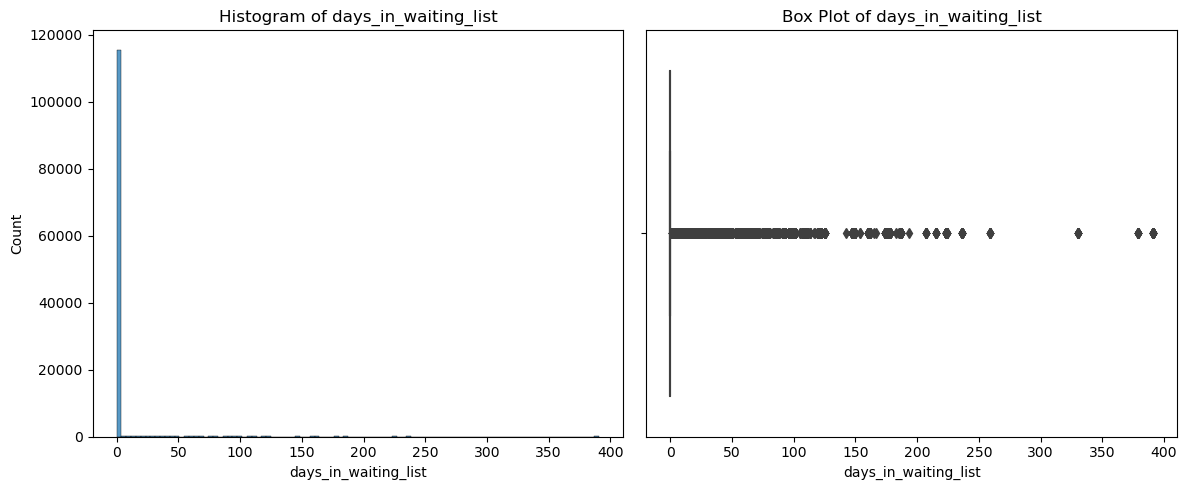

count    119208.000000
mean          2.321254
std          17.598147
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [48]:
# Call the function with 'lead_time' column
hist_and_box_plots('days_in_waiting_list')

In [49]:
no_wait_list = (num_data['days_in_waiting_list'] == 0).sum()
wait_list = (num_data['days_in_waiting_list'] > 0).sum()

print(f"Count of no_wait_list: {no_wait_list}; Count in wait_list: {wait_list}")

Count of no_wait_list: 115515; Count in wait_list: 3693


In [50]:
# Create a new column 'included_in_waiting_list'
num_data['included_in_waiting_list'] = num_data['days_in_waiting_list'].apply(lambda x: 'No' if x == 0 else 'Yes')

num_data['included_in_waiting_list'].value_counts()

No     115515
Yes      3693
Name: included_in_waiting_list, dtype: int64

In [51]:
# Drop original column
num_data = num_data.drop('days_in_waiting_list', axis = 1)

In [52]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119208.0,0.376023,0.484388,0.0,0.0,0.0,1.0,1.0
lead_time,119208.0,102.387302,101.335101,0.0,18.0,69.0,161.0,375.5
arrival_date_year,119208.0,2016.156466,0.707487,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119208.0,27.163638,13.601068,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119208.0,15.798730,8.781048,1.0,8.0,16.0,23.0,31.0
total_nights,119208.0,2.132961,2.603323,0.0,0.0,1.0,3.0,69.0
stays_in_weekend_nights,119208.0,0.927035,0.995082,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119208.0,2.499178,1.897090,0.0,1.0,2.0,3.0,50.0
adults,119208.0,1.859204,0.575190,0.0,2.0,2.0,2.0,55.0
children,119208.0,0.104045,0.398839,0.0,0.0,0.0,0.0,10.0


In [53]:
# Check same length before concatenating
len(num_data) == len(cat_data)

True

In [54]:
filtered_data = pd.concat([num_data, cat_data], axis = 1)
display(filtered_data.head(), filtered_data.shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_day,reservation_status_month,reservation_status_year,guest_quant,included_in_waiting_list,hotel,arrival_date_month,weekend_or_weekday,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,country_or_continent,deposit_given
0,1,342.0,2015,27,1,0,0,0,2,0,0,0,0,0,3,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled,PRT,0
1,1,375.5,2015,27,1,0,0,0,2,0,0,0,0,0,4,0.0,0,0,1,7,2015,Double,No,Resort Hotel,July,undefined_data,BB,Direct,Direct,C,C,No Deposit,Transient,Canceled,PRT,0
2,0,7.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out,GBR,0
3,0,13.0,2015,27,1,1,0,1,1,0,0,0,0,0,0,75.0,0,0,2,7,2015,Single,No,Resort Hotel,July,stay_just_weekdays,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,GBR,0
4,0,14.0,2015,27,1,2,0,2,2,0,0,0,0,0,0,98.0,0,1,3,7,2015,Double,No,Resort Hotel,July,stay_just_weekdays,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,GBR,0


(119208, 36)

In [55]:
filtered_data.dtypes

is_canceled                          int64
lead_time                          float64
arrival_date_year                    int64
arrival_date_week_number             int64
arrival_date_day_of_month            int64
total_nights                         int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                             int64
babies                               int64
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
booking_changes                      int64
adr                                float64
required_car_parking_spaces          int64
total_of_special_requests            int64
reservation_status_day               int64
reservation_status_month             int64
reservation_status_year              int64
guest_quant                       category
included_in_waiting_list            object
hotel      

In [56]:
cat_features = filtered_data.select_dtypes(include=['object', 'category'])
num_features = filtered_data.select_dtypes(include=['int64', 'float64'])

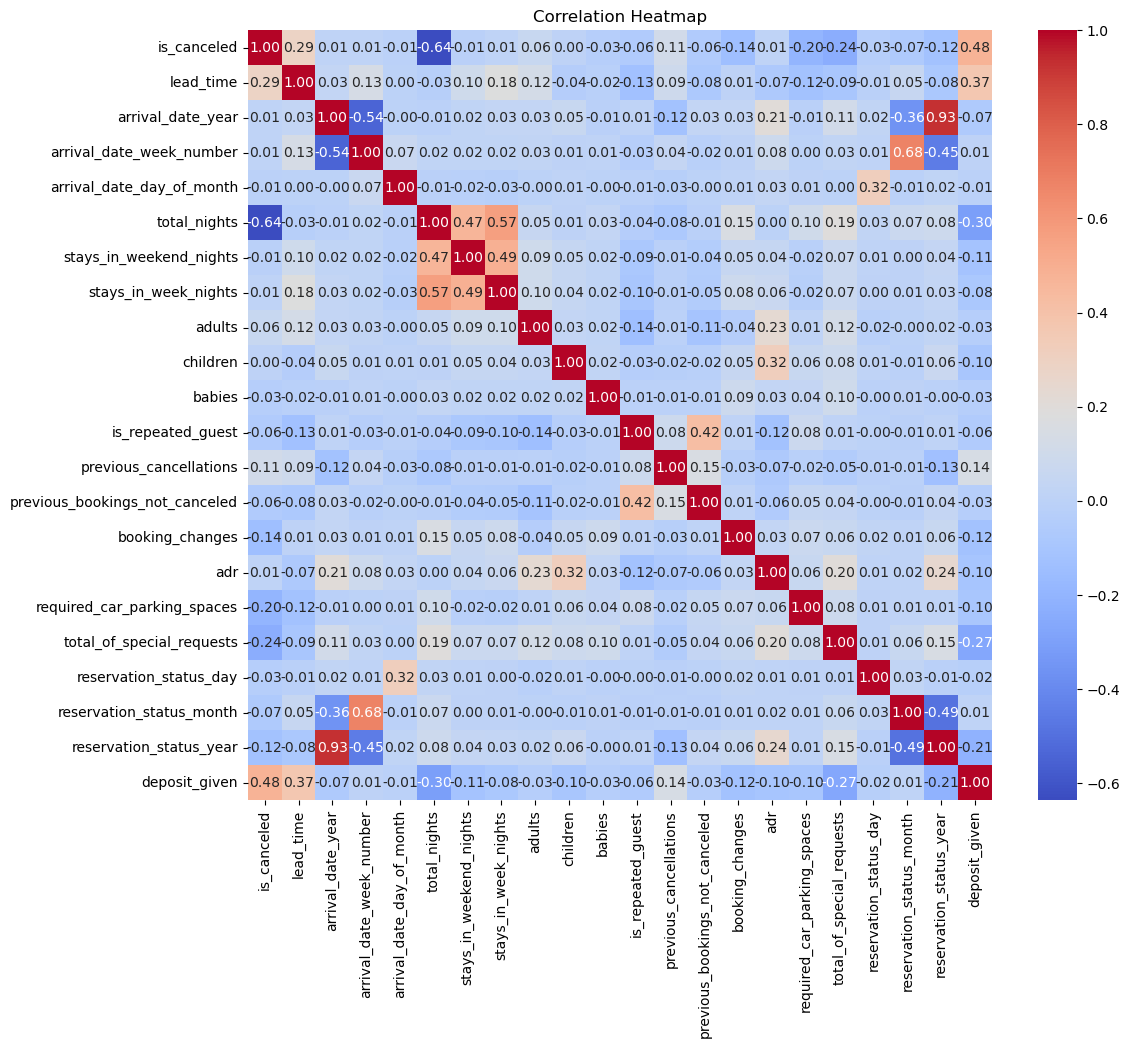

In [57]:
# Correlation
corr = num_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# Define the threshold values
positive_threshold = 0.65
negative_threshold = -0.65

print("Pairs with correlation greater than or equal to 0.65:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] >= positive_threshold:
            print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")

print("\nPairs with correlation smaller than or equal to -0.65:\n")
for feature1 in corr.columns:
    for feature2 in corr.index:
        if feature1 != feature2 and corr.loc[feature1, feature2] <= negative_threshold:
            print(f"{feature1} - {feature2}: {corr.loc[feature1, feature2]:.2f}")


Pairs with correlation greater than or equal to 0.65:

arrival_date_year - reservation_status_year: 0.93
arrival_date_week_number - reservation_status_month: 0.68
reservation_status_month - arrival_date_week_number: 0.68
reservation_status_year - arrival_date_year: 0.93

Pairs with correlation smaller than or equal to -0.65:



In [59]:
# Drop highly correlated features
num_features = num_features.drop(['reservation_status_year','arrival_date_week_number'],axis=1)

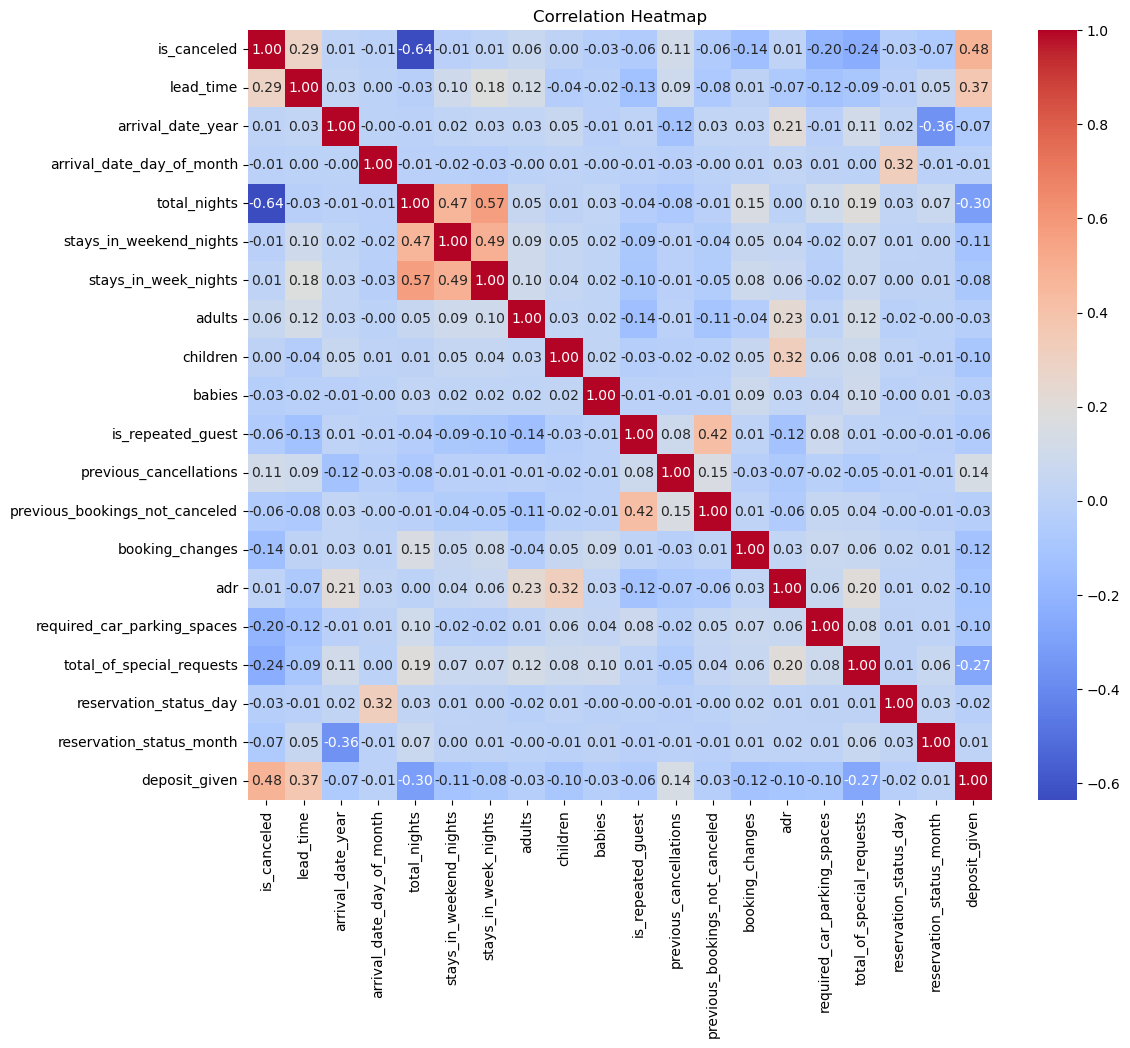

In [60]:
# Correlation
corr = num_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
num_features = num_features.drop('is_canceled', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on num_features
scaled_num_features = scaler.fit_transform(num_features)

# Create a DataFrame from the scaled features
scaled_num_features_df = pd.DataFrame(scaled_num_features, columns=num_features.columns)

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on cat_features
encoded_cat_features = encoder.fit_transform(cat_features)

# Create a DataFrame from the encoded features
encoded_cat_features_df = pd.DataFrame(encoded_cat_features.toarray(), columns=encoder.get_feature_names_out(cat_features.columns))

In [64]:
# Concatenate the scaled numerical features and the encoded categorical features
processed_data = pd.concat([data['is_canceled'],scaled_num_features_df, encoded_cat_features_df], axis=1)
processed_data.shape

(119210, 106)

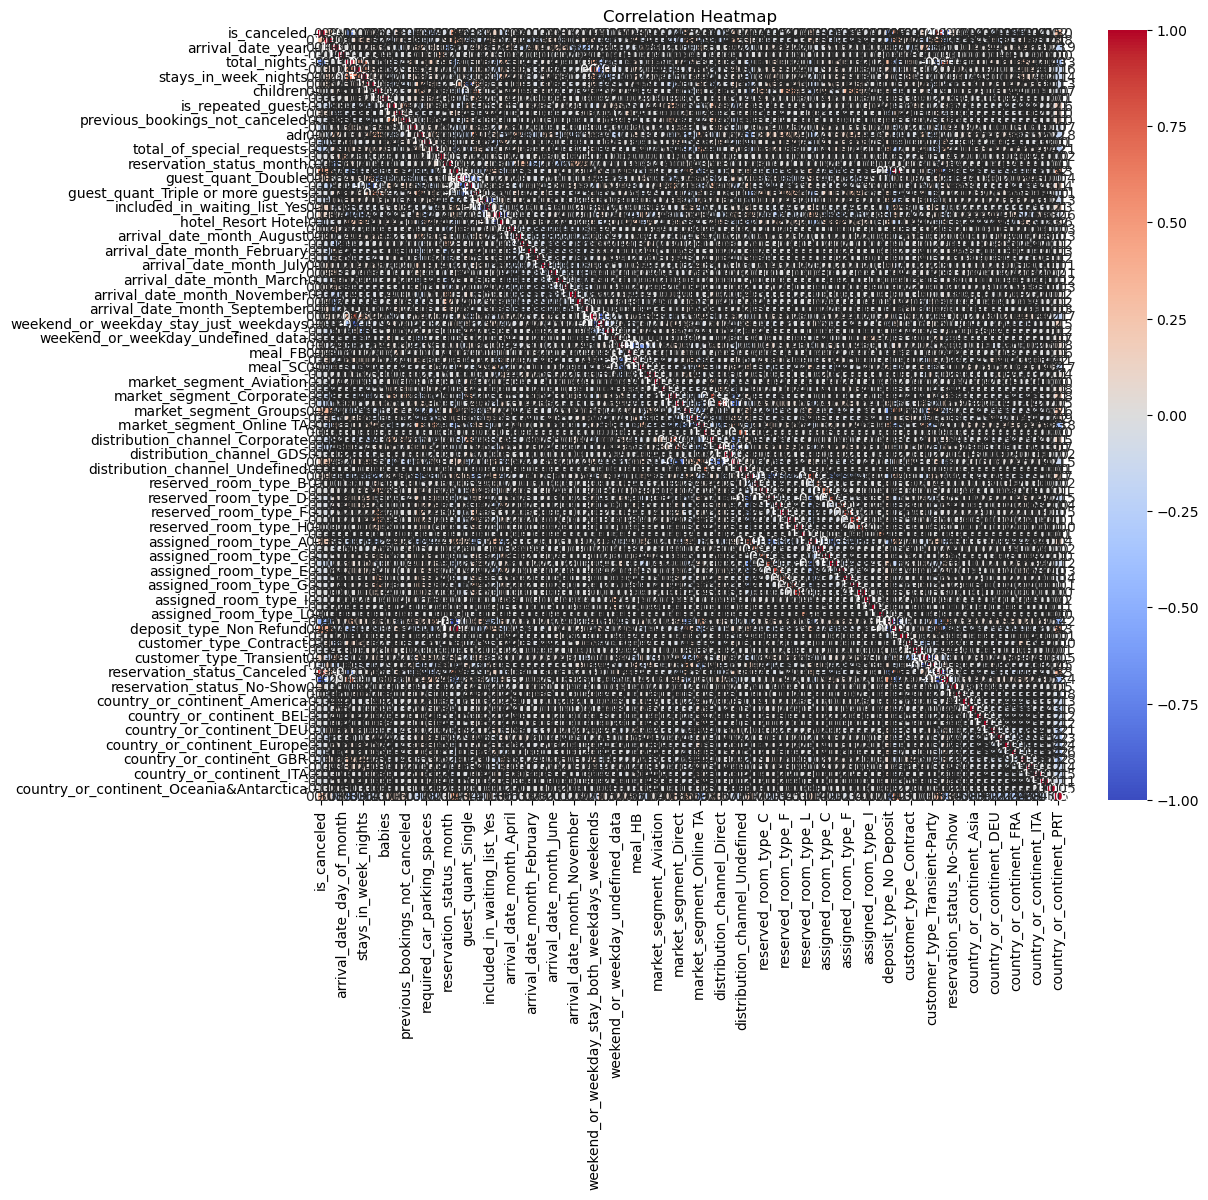

In [65]:
# Correlation
corr = processed_data.corr()

# Create a heatmap
#plt.figure(figsize=(12, 10))
#sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Heatmap")
#plt.show()

In [66]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                     1.000000
reservation_status_Canceled     0.879738
deposit_given                   0.460421
deposit_type_Non Refund         0.460421
country_or_continent_PRT        0.298476
                                  ...   
required_car_parking_spaces    -0.185213
total_of_special_requests      -0.224793
deposit_type_No Deposit        -0.456929
total_nights                   -0.572961
reservation_status_Check-Out   -0.895298
Name: is_canceled, Length: 106, dtype: float64

In [67]:
processed_data = processed_data.drop(['reservation_status_Canceled', 'reservation_status_Check-Out'], axis=1)

In [68]:
processed_data.shape

(119210, 104)

#### Feature Selection

In [69]:
processed_data = processed_data.dropna()

In [70]:
# Split target - features
x = processed_data.drop('is_canceled', axis=1)
y = processed_data['is_canceled']

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [73]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [74]:
feature_sel_model.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

In [75]:
cols = x.columns
cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_day_of_month',
       'total_nights', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       ...
       'country_or_continent_DEU', 'country_or_continent_ESP',
       'country_or_continent_Europe', 'country_or_continent_FRA',
       'country_or_continent_GBR', 'country_or_continent_IRL',
       'country_or_continent_ITA', 'country_or_continent_NLD',
       'country_or_continent_Oceania&Antarctica', 'country_or_continent_PRT'],
      dtype='object', length=103)

In [76]:
# Filter: selected features
selected_feature = cols[feature_sel_model.get_support()]
selected_feature

Index(['lead_time', 'total_nights', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_month', 'deposit_given', 'guest_quant_Single',
       'weekend_or_weekday_stay_both_weekdays_weekends',
       'market_segment_Online TA', 'distribution_channel_TA/TO',
       'customer_type_Transient-Party', 'country_or_continent_PRT'],
      dtype='object')

In [77]:
x = x[selected_feature]
x

,lead_time,total_nights,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,deposit_given,guest_quant_Single,weekend_or_weekday_stay_both_weekdays_weekends,market_segment_Online TA,distribution_channel_TA/TO,customer_type_Transient-Party,country_or_continent_PRT
0,2.364568,-0.819326,-0.931621,-1.317380,0.244783,-0.180319,-0.0915,4.355990,-2.330177,-0.254949,-0.720811,0.199147,-0.373385,0.0,0.0,0.0,0.0,0.0,1.0
1,2.695155,-0.819326,-0.931621,-1.317380,0.244783,-0.180319,-0.0915,5.922205,-2.330177,-0.254949,-0.720811,0.199147,-0.373385,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.941310,-0.435200,-0.931621,-0.790255,-1.493780,-0.180319,-0.0915,-0.342652,-0.610687,-0.254949,-0.720811,0.199147,-0.373385,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.882100,-0.435200,-0.931621,-0.790255,-1.493780,-0.180319,-0.0915,-0.342652,-0.610687,-0.254949,-0.720811,0.199147,-0.373385,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.872232,-0.051074,-0.931621,-0.263129,0.244783,-0.180319,-0.0915,-0.342652,-0.083377,-0.254949,0.540421,0.199147,-0.373385,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119203,-0.783417,1.869556,1.078272,1.318247,0.244783,-0.180319,-0.0915,-0.342652,-0.126020,-0.254949,-0.720811,0.796913,-0.373385,0.0,1.0,0.0,1.0,0.0,0.0
119204,-0.003822,1.869556,1.078272,1.318247,1.983345,-0.180319,-0.0915,-0.342652,2.484394,-0.254949,1.801652,0.796913,-0.373385,0.0,1.0,1.0,1.0,0.0,0.0
119205,-0.674866,1.869556,1.078272,1.318247,0.244783,-0.180319,-0.0915,-0.342652,1.285566,-0.254949,4.324115,0.796913,-0.373385,0.0,1.0,1.0,1.0,0.0,0.0
119206,0.065256,1.869556,1.078272,1.318247,0.244783,-0.180319,-0.0915,-0.342652,0.063353,-0.254949,-0.720811,0.796913,-0.373385,0.0,1.0,1.0,1.0,0.0,0.0


In [78]:
y

0         1
1         1
2         0
3         0
4         0
         ..
119203    0
119204    0
119205    0
119206    0
119207    0
Name: is_canceled, Length: 119208, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [81]:
X_train.shape

(89406, 19)

In [82]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Model
logreg=LogisticRegression()

# Fit the model with train data
logreg.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Predict array
pred=logreg.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
#### Evaluate: Confusion Matrix, Accuracy Score, Classification Report...
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
# Confusion Matrix
confusion_matrix(y_test, pred)

array([[18031,   591],
       [ 1073, 10107]])


    - Top Left: True Positive
    - Top Right: False Positive
    - Bottom Left: False Negative
    - Bottom Right: True Negative



In [86]:
# Accuracy score
acsc= accuracy_score(y_test, pred)
print('Accuracy score: ', round(acsc,3))

Accuracy score:  0.944


In [87]:
### Cross Validation
from sklearn.model_selection import cross_val_score

In [88]:
score = cross_val_score(logreg, x, y, cv=10)
score

array([0.96401309, 0.98221626, 0.88851606, 0.89942119, 0.83046724,
       0.95990269, 0.98599111, 0.98884322, 0.98934564, 0.92676174])

In [89]:
score.mean()

0.9415478240699822

In [90]:
### Decision Tree

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
models = []
models.append(('Logistic Regression', LogisticRegression()))  # 2nd to initialize
models.append(('Naive bayes', GaussianNB()))  
models.append(('Random Forest', RandomForestClassifier()))  
models.append(('Decision Tree', DecisionTreeClassifier())) 
models.append(('KNN', KNeighborsClassifier()))

In [93]:
models

[('Logistic Regression', LogisticRegression()),
 ('Naive bayes', GaussianNB()),
 ('Random Forest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [94]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train) # fit models
    
    predictions = model.predict(X_test) # prediciton
    
    from sklearn.metrics import confusion_matrix, accuracy_score
    print(confusion_matrix(predictions, y_test))
    print('\n')
    print(accuracy_score(predictions, y_test))
    print('\n')

Logistic Regression
[[18031  1073]
 [  591 10107]]


0.9441648211529428


Naive bayes
[[15136  1375]
 [ 3486  9805]]


0.8368901416012349


Random Forest
[[18007   762]
 [  615 10418]]


0.953795047312261


Decision Tree
[[17614  1019]
 [ 1008 10161]]


0.9319844305751291


KNN
[[17939  1224]
 [  683  9956]]


0.9360110059727536




In [95]:
results = []

for name, model in models:
    model.fit(X_train, y_train)  # fit model
    predictions = model.predict(X_test)  # prediction
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    accuracy = accuracy_score(y_test, predictions)

    results.append([name, tp, fp, fn, tn, accuracy])

# Creating a DataFrame from the results list
columns = ['Model', 'True Positive', 'False Positive', 'False Negative', 'True Negative', 'Accuracy Score']
results_df = pd.DataFrame(results, columns=columns)

# Find the row with the highest accuracy
highest_accuracy_row = results_df.loc[results_df['Accuracy Score'].idxmax()]

# Apply styling to highlight the row with the highest accuracy
highlighted_results_df = results_df.style.apply(lambda row: ['background: purple' if row.equals(highest_accuracy_row) else '' for v in row], axis=1)

highlighted_results_df

,Model,True Positive,False Positive,False Negative,True Negative,Accuracy Score
0,Logistic Regression,10107,591,1073,18031,0.944165
1,Naive bayes,9805,3486,1375,15136,0.836890
2,Random Forest,10417,613,763,18009,0.953829
3,Decision Tree,10159,1020,1021,17602,0.931515
4,KNN,9956,683,1224,17939,0.936011


Comparison:

    - The Random Forest model achieved the highest accuracy score of 95.24%, outperforming other models.

    - Logistic Regression and KNN also demonstrated strong accuracy scores (94.14% and 93.38% respectively).

    - Naive Bayes had the lowest accuracy score (83.57%) among the models.

    - Random Forest had the lowest number of false negatives (810) and showed a balanced performance between positive and negative predictions.

    - Naive Bayes had a relatively higher number of false positives (3464) compared to other models.
    
    - Decision Tree performed well with an accuracy score of 93.02%, but it had a higher number of false positives (1049) and false negatives (1032) compared to some other models.

Based on these results, the Random Forest model stands out as the best performer in terms of accuracy and overall balance between true positive and true negative predictions. However, the choice of model should consider the specific goals of your application and the trade-offs between different types of errors.

In [96]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)  # fit models
    
    predictions = model.predict(X_test)  # prediction
    
    accuracy = accuracy_score(predictions, y_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)  # corrected metric name
    
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")  # corrected metric name
    
    print("=" * 40)


Logistic Regression
Accuracy Score: 0.9442
Mean Absolute Error: 0.0558
R-squared Score: 0.7618
Mean Squared Error: 0.0558
Naive Bayes
Accuracy Score: 0.8369
Mean Absolute Error: 0.1631
R-squared Score: 0.3042
Mean Squared Error: 0.1631
Random Forest
Accuracy Score: 0.9538
Mean Absolute Error: 0.0462
R-squared Score: 0.8027
Mean Squared Error: 0.0462
Decision Tree
Accuracy Score: 0.9324
Mean Absolute Error: 0.0676
R-squared Score: 0.7114
Mean Squared Error: 0.0676
KNN
Accuracy Score: 0.9360
Mean Absolute Error: 0.0640
R-squared Score: 0.7270
Mean Squared Error: 0.0640


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, r2_score, mean_squared_error

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(name, "\n")
    model.fit(X_train, y_train)  # fit models
    
    predictions = model.predict(X_test)  # prediction
    
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print("Confusion Matrix:")
    print(cm)
    print("\n")
    
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    
    print("\n")
    print("=" * 40)
    print("\n")


Logistic Regression 

Confusion Matrix:
[[18031   591]
 [ 1073 10107]]


Accuracy Score: 0.9442
Mean Absolute Error: 0.0558
R-squared Score: 0.7618
Mean Squared Error: 0.0558




Naive Bayes 

Confusion Matrix:
[[15136  3486]
 [ 1375  9805]]


Accuracy Score: 0.8369
Mean Absolute Error: 0.1631
R-squared Score: 0.3042
Mean Squared Error: 0.1631




Random Forest 

Confusion Matrix:
[[18004   618]
 [  775 10405]]


Accuracy Score: 0.9533
Mean Absolute Error: 0.0467
R-squared Score: 0.8006
Mean Squared Error: 0.0467




Decision Tree 

Confusion Matrix:
[[17604  1018]
 [  996 10184]]


Accuracy Score: 0.9324
Mean Absolute Error: 0.0676
R-squared Score: 0.7117
Mean Squared Error: 0.0676




KNN 

Confusion Matrix:
[[17939   683]
 [ 1224  9956]]


Accuracy Score: 0.9360
Mean Absolute Error: 0.0640
R-squared Score: 0.7270
Mean Squared Error: 0.0640






The provided results showcase the performance of various classification models on a dataset. Let's delve into each model's outcomes and make comparisons:

**Logistic Regression:**
The Logistic Regression model achieves a notable accuracy score of 94.14%, indicating its proficiency in classifying instances. It demonstrates a balanced performance with a relatively low mean absolute error of 0.0586. The R-squared score of 0.7506 suggests that this model captures a substantial portion of the variance in the data, making it a reasonable choice.

**Naive Bayes:**
Naive Bayes exhibits an accuracy score of 83.57%, which is slightly lower than other models. However, the model's mean absolute error of 0.1643 implies that it can make predictions with a reasonable level of precision. The R-squared score of 0.3003 suggests that the model's explanatory power is limited compared to other models.

**Random Forest:**
The Random Forest model outperforms others in terms of accuracy, achieving an impressive 95.24%. Its very low mean absolute error of 0.0476 indicates that its predictions are quite close to the actual values. With an R-squared score of 0.7972, the model captures a substantial portion of data variance, making it one of the best performers.

**Decision Tree:**
The Decision Tree model achieves an accuracy of 92.98%, showcasing a commendable performance. Its mean absolute error of 0.0702 indicates that the model's predictions might have slightly more variation compared to some others. The R-squared score of 0.7012 suggests that it explains a significant portion of the data variance, but not as much as the Random Forest.

**KNN:**
The K-Nearest Neighbors (KNN) model demonstrates an accuracy of 93.38%. Its mean absolute error of 0.0662 and R-squared score of 0.7179 align closely with the Decision Tree, indicating comparable predictive ability and explanatory power.

In summary, the Random Forest model emerges as the frontrunner in terms of accuracy, closely followed by the Logistic Regression and KNN models. Each model has its strengths and weaknesses, with the Logistic Regression and Random Forest models excelling in balancing prediction accuracy and explanatory power. The Naive Bayes model lags slightly behind in accuracy and explanatory ability, while the Decision Tree and KNN models offer solid overall performance.